<a href="https://colab.research.google.com/github/babymlin/Cifar10_80_percent/blob/main/Cifar10_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-addons
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

     |████████████████████████████████| 686kB 4.1MB/s 


In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(X_train, y_train), (X_test, y_test) = load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [ ]:
class_names = [
  "airplane",										
  "automobile",										
  "bird",										
  "cat",										
  "deer",										
  "dog",										
  "frog",										
  "horse",										
  "ship",										
  "truck"
]

In [ ]:
input_shape = X_train.shape[1:]
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Softmax, MaxPooling2D, Flatten, BatchNormalization, LeakyReLU, GlobalAveragePooling2D, Dropout, DepthwiseConv2D
layers1 = [
  Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu", input_shape=input_shape),
  MaxPooling2D(),
  Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"),
  MaxPooling2D(),
  Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu"),
  MaxPooling2D(),
  GlobalAveragePooling2D(),
  Dense(units=10),
  Softmax()
] 
layers = [
  Conv2D(filters=64, kernel_size=3, strides=1, padding="same", input_shape=input_shape),
  BatchNormalization(),
  LeakyReLU(alpha=1e-3),
  MaxPooling2D(),
  Conv2D(filters=128, kernel_size=3, strides=1, padding="same"),
  BatchNormalization(),
  LeakyReLU(alpha=1e-3),
  MaxPooling2D(),
  Conv2D(filters=256, kernel_size=3, strides=1, padding="same"),
  BatchNormalization(),
  LeakyReLU(alpha=1e-3),
  MaxPooling2D(),
  GlobalAveragePooling2D(),
  Dense(units=10),
  Softmax()
] 
model = Sequential(layers)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_25 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16, 16, 128)      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
callbacks = [
  EarlyStopping(monitor="val_loss",
        restore_best_weights=True,
        patience=5,
        ),
  ModelCheckpoint("Cifar10v2-BestModel.h5", monitor="val_loss", save_best_only=True),
  CSVLogger("Cifar10v2.csv")
]

In [ ]:
radam = tfa.optimizers.RectifiedAdam()
ranger = tfa.optimizers.Lookahead(radam)
model.compile(optimizer=ranger, loss="SparseCategoricalCrossentropy", metrics=["accuracy"])

In [ ]:
batch_size = 64
epochs = 100
model.fit(X_train_norm,
    y_train,
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1, 
    callbacks=callbacks,
    verbose=2
)

Epoch 1/100
704/704 - 32s - loss: 1.5215 - accuracy: 0.4660 - val_loss: 1.3831 - val_accuracy: 0.4962
Epoch 2/100
704/704 - 23s - loss: 1.1515 - accuracy: 0.5984 - val_loss: 1.3804 - val_accuracy: 0.5042
Epoch 3/100
704/704 - 20s - loss: 1.0172 - accuracy: 0.6472 - val_loss: 1.3388 - val_accuracy: 0.5368
Epoch 4/100
704/704 - 20s - loss: 0.9195 - accuracy: 0.6822 - val_loss: 1.4540 - val_accuracy: 0.5358
Epoch 5/100
704/704 - 20s - loss: 0.8378 - accuracy: 0.7133 - val_loss: 3.0099 - val_accuracy: 0.3082
Epoch 6/100
704/704 - 20s - loss: 0.7728 - accuracy: 0.7357 - val_loss: 0.9627 - val_accuracy: 0.6650
Epoch 7/100
704/704 - 24s - loss: 0.7192 - accuracy: 0.7568 - val_loss: 1.5924 - val_accuracy: 0.4736
Epoch 8/100
704/704 - 22s - loss: 0.6710 - accuracy: 0.7740 - val_loss: 1.4983 - val_accuracy: 0.5758
Epoch 9/100
704/704 - 20s - loss: 0.6204 - accuracy: 0.7922 - val_loss: 0.8629 - val_accuracy: 0.7050
Epoch 10/100
704/704 - 20s - loss: 0.5792 - accuracy: 0.8064 - val_loss: 1.0888 - 

In [ ]:
model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7385 - accuracy: 0.7471


[0.7384617924690247, 0.7470999956130981]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


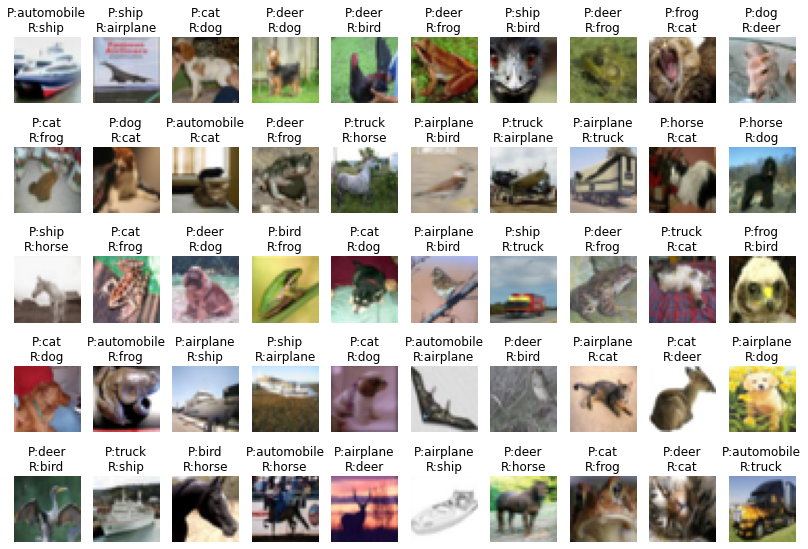

In [ ]:
pre = model.predict_classes(X_test_norm)
import numpy as np
wrong_list = np.nonzero(pre != y_test.reshape(-1))[0] #預測錯誤列表
wrong_list = wrong_list[:200]
right_lable = y_test[wrong_list] #預測錯誤圖片的正確標籤
pre_lable = pre[wrong_list] #預測錯誤圖片的預測標籤
wrong_img = X_test[wrong_list] #錯誤圖片

plt.figure(figsize=(20, 40))
width = 10
height = len(wrong_img)//width + 1
for i, img in enumerate(wrong_img[:50]):
  plt.subplot(height, width, i+1)
  plt.axis("off")
  title = f"P:{class_names[pre_lable[i]]}\nR:{class_names[right_lable[i][0]]}"
  plt.title(title)
  plt.imshow(img)

請輸入網址：https://images.chinatimes.com/newsphoto/2019-03-24/656/20190324002225.jpg
airplane 的機率: 0.998
automobile 的機率: 0.0
bird 的機率: 0.001
cat 的機率: 0.0
deer 的機率: 0.0
dog 的機率: 0.0
frog 的機率: 0.0
horse 的機率: 0.0
ship 的機率: 0.0
truck 的機率: 0.0


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


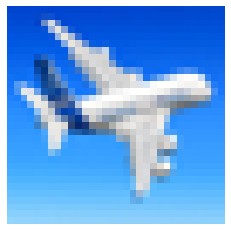

In [ ]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
url = input("請輸入網址：")
response = requests.get(url, verify=False, stream=True)
img = Image.open(response.raw)
img = img.resize((32, 32)).convert("RGB")
img_np = np.array(img)
img_norm = np.expand_dims(img_np/255.0, axis=0)
pre = model.predict(img_norm)[0]
for n, p in zip(class_names, pre):
    print(n, "的機率:", round(p, 3))
plt.axis("off")
plt.imshow(img)